# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

In [1]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.11.4
numpy version:  1.24.4
pandas version:  2.0.3
statsmodels version:  0.14.0


You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [8]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
# Importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Importing packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Loading dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


**response:**

The purposes of EDA before constructing a logistic regression model are

to identify data anomalies such as outliers and class imbalance that might affect the modeling;

to verify model assumptions such as no severe multicollinearity.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

In [11]:
# Displaying first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [12]:
# Getting number of rows and columns
data.shape

(19382, 12)

In [15]:
# Getting data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [16]:
# Getting basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [17]:
# Generatig basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [18]:
# Checking for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [19]:
# Dropping rows with missing values
data.dropna(axis=0)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [20]:
# Displaying first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [21]:
# Checking for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

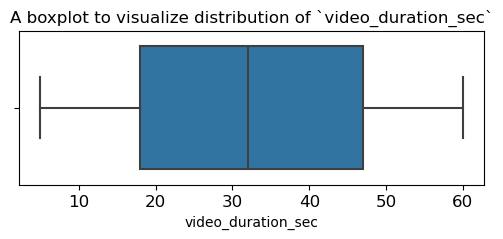

In [23]:
# Creating a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6, 2))
plt.title("A boxplot to visualize distribution of `video_duration_sec`", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

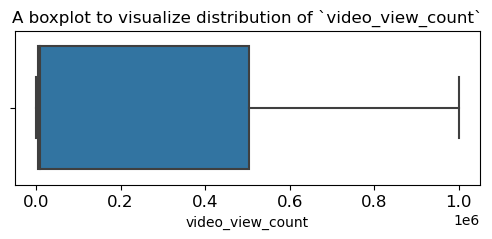

In [24]:
# Creating a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6, 2))
plt.title("A boxplot to visualize distribution of `video_view_count`", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'])
plt.show()

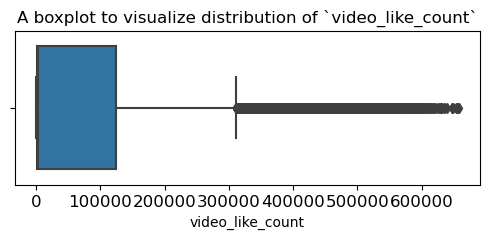

In [25]:
# Creating a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6, 2))
plt.title("A boxplot to visualize distribution of `video_like_count`", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()


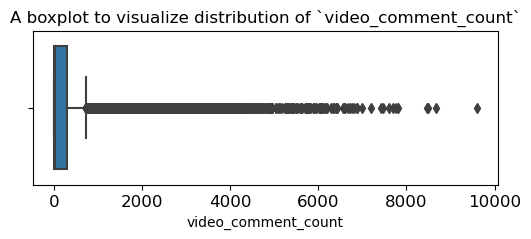

In [26]:
# Creating a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6, 2))
plt.title("A boxplot to visualize distribution of `video_comment_count`", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment'])
plt.show()


In [29]:
# Checking for and handling outliers for video_like_count
percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [30]:
# Checking class balance
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.936023
verified        0.063977
Name: proportion, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [38]:
# Using resampling to create class balance in the outcome variable, if needed

# Identifing data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsampling the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combining majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Displaying new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    18142
verified        18142
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [45]:
# Getting the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(str(text)) for text in array]))


,video_transcription_text
verified_status,
not verified,88.172418
verified,81.849520


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [46]:
# Extracting the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(str(text)))

In [47]:
# Displaying first few rows of dataframe after adding new column
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

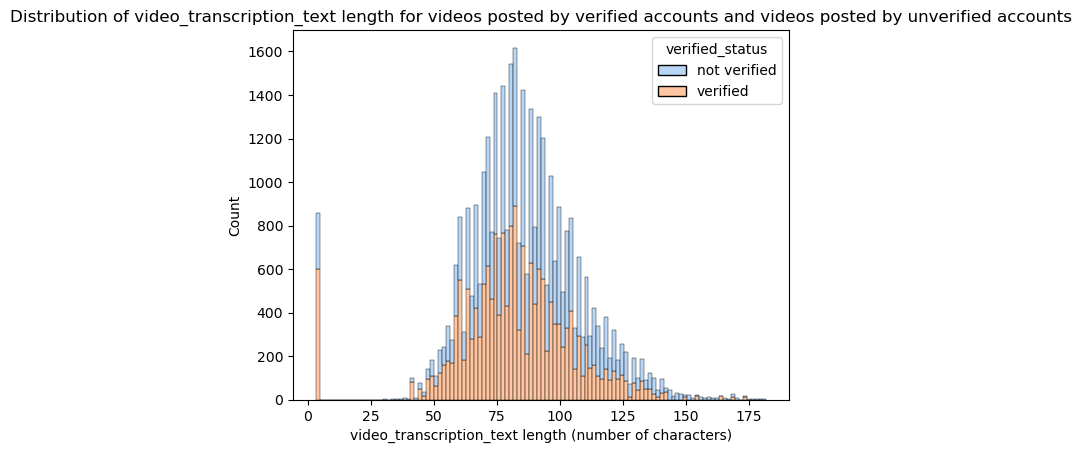

In [50]:
# Visualizing the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Creating two histograms in one plot
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### **Task 2b. Examine correlations**

In [51]:
# Coding a correlation matrix to help determine most correlated variables
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,0.000611,-0.011812,-0.696840,-0.626020,-0.503479,-0.486610,-0.413404,-0.285314
video_id,0.000611,1.000000,0.016749,0.002295,0.005792,0.010284,0.008621,0.014072,-0.009873
video_duration_sec,-0.011812,0.016749,1.000000,0.013686,0.004684,0.002196,0.003943,-0.004629,-0.002966
video_view_count,-0.696840,0.002295,0.013686,1.000000,0.856686,0.710653,0.689695,0.583114,0.245245
video_like_count,-0.626020,0.005792,0.004684,0.856686,1.000000,0.831685,0.805412,0.686466,0.216855
video_share_count,-0.503479,0.010284,0.002196,0.710653,0.831685,1.000000,0.709970,0.619963,0.171820
video_download_count,-0.486610,0.008621,0.003943,0.689695,0.805412,0.709970,1.000000,0.857575,0.173452
video_comment_count,-0.413404,0.014072,-0.004629,0.583114,0.686466,0.619963,0.857575,1.000000,0.149658
text_length,-0.285314,-0.009873,-0.002966,0.245245,0.216855,0.171820,0.173452,0.149658,1.000000


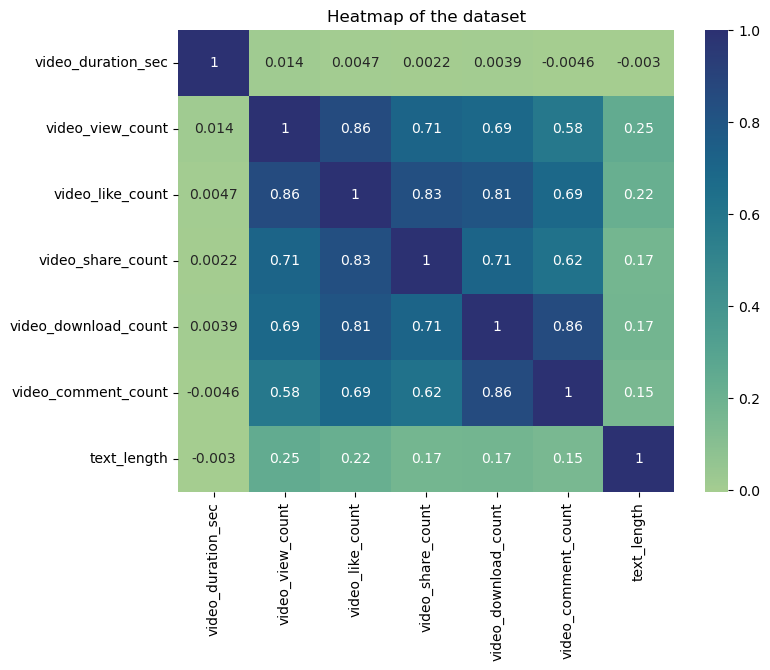

In [52]:
# Creating a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.


**response:** The above heatmap shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.86 correlation coefficient).

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, you could exclude `video_like_count`. And among the variables that quantify video metrics, you could keep `video_view_count`, `video_share_count`, `video_download_count`, and `video_comment_count` as features.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [56]:
# Selecting outcome variable
y = data_upsampled["verified_status"]

Select the features.

In [53]:
# Selecting features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]


# Displaying first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

In [57]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [58]:
# Getting shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27213, 7), (9071, 7), (27213,), (9071,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [59]:
# Checking data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [60]:
# Getting unique values in `claim_status`
X_train["claim_status"].unique()


array(['claim', 'opinion', nan], dtype=object)

In [61]:
# Gettng unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [62]:
# Selecting the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Displaying first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
4691,claim,active
11044,opinion,active
27335,opinion,active
575,claim,active
19733,opinion,active


In [63]:
# Setting up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [64]:
# Fitting and transforming the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [65]:
# Getting feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'claim_status_nan',
       'author_ban_status_banned', 'author_ban_status_under review'],
      dtype=object)

In [66]:
# Displaying first few rows of encoded training features
X_train_encoded

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [67]:
# Placing encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())


# Displaying first few rows
X_train_encoded_df.head()

,claim_status_opinion,claim_status_nan,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [68]:
# Displaying first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
4691,59,922147.0,74619.0,5698.0,3753.0
11044,22,2476.0,3.0,0.0,0.0
27335,12,4235.0,3.0,0.0,0.0
575,27,218127.0,18985.0,454.0,79.0
19733,27,8019.0,287.0,23.0,1.0


In [69]:
# Concatenating `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Displaying first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,claim_status_nan,author_ban_status_banned,author_ban_status_under review
0,59,922147.0,74619.0,5698.0,3753.0,0.0,0.0,0.0,0.0
1,22,2476.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12,4235.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
3,27,218127.0,18985.0,454.0,79.0,0.0,0.0,0.0,0.0
4,27,8019.0,287.0,23.0,1.0,1.0,0.0,0.0,0.0


In [70]:
# Checking data type of outcome variable
y_train.dtype

dtype('O')

In [76]:
# Getting unique values of outcome variable
y_train.unique()

array(['not verified', 'verified'], dtype=object)

In [77]:
# Setting up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [82]:
# Encoding the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Displaying the encoded training outcome variable
y_train_final

array([0., 0., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [103]:
# Constructing a logistic regression model and fitting it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [85]:
# Selecting the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Displaying first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
33801,opinion,active
19181,claim,active
17647,opinion,active
28117,opinion,active
13447,opinion,active


In [86]:
# Transforming the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Displaying first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [87]:
# Placing encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Displaying first few rows
X_test_encoded_df.head()

,claim_status_opinion,claim_status_nan,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [88]:
# Displaing first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33801,7,9593.0,185.0,9.0,2.0
19181,29,282723.0,5528.0,175.0,29.0
17647,47,7199.0,269.0,51.0,19.0
28117,15,8713.0,218.0,19.0,6.0
13447,6,8757.0,606.0,62.0,14.0


In [89]:
# Concatenating `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)


# Displaying first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,claim_status_nan,author_ban_status_banned,author_ban_status_under review
0,7,9593.0,185.0,9.0,2.0,1.0,0.0,0.0,0.0
1,29,282723.0,5528.0,175.0,29.0,0.0,0.0,0.0,0.0
2,47,7199.0,269.0,51.0,19.0,1.0,0.0,0.0,0.0
3,15,8713.0,218.0,19.0,6.0,1.0,0.0,0.0,0.0
4,6,8757.0,606.0,62.0,14.0,1.0,0.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [90]:
# Using the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

NameError: name 'log_clf' is not defined

Display the predictions on the encoded testing set.

In [104]:
# Displaying the predictions on the encoded testing set
y_pred

NameError: name 'y_pred' is not defined

Display the true labels of the testing set.

In [96]:
# Displaying the true labels of the testing set
y_test

33801        verified
19181        verified
17647    not verified
28117        verified
13447    not verified
             ...     
3673     not verified
26893        verified
5549     not verified
18995        verified
13330    not verified
Name: verified_status, Length: 9071, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [97]:
# Encoding the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Displaying the encoded testing outcome variable
y_test_final

array([1., 1., 0., ..., 0., 1., 0.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [98]:
# Getting shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((27213, 9), (27213,), (9071, 9), (9071,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

In [99]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Displaying plot
plt.show()

NameError: name 'y_pred' is not defined

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [101]:
# Creating a classification report
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

NameError: name 'y_pred' is not defined

### **Task 4c. Interpret model coefficients**

In [102]:
# Getting the feature names from the model and the model coefficients (which represent log-odds ratios)
# Placing into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

 **response:**

Key takeaways:

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 